In [1]:
import scvelo as scv
from IPython.display import clear_output
import matplotlib.backends.backend_pdf
from tqdm import tnrange, tqdm_notebook
import scanpy as sc
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline


scv.logging.print_version()
scv.settings.set_figure_params(
    'scvelo', dpi_save=100, dpi=80, transparent=True)
scv.settings.verbosity = 2

Running scvelo 0.1.16.dev32+c00a55e.dirty (python 3.6.6) on 2020-12-09 15:14.


In [2]:
# paths and names
data_path='G:/data/scSLAMseq/revision/'
signatures_path='G:/data/scrnaseq_signature_collection/'
figure_path='G:/data/figures/'
libraries = ['AB', 'CE', 'DF']
donors=['B2-040', 'C2-019', 'OT227', 'OT302', 'P009T', 'P013T']

perturbations = ['DMSO', 'EGFR', 'EGFR + MEK', 'EGFR + BRAF', 'MEK', 'BRAF']  # in this very order
perturbations_ = ['DMSO', 'EGFRi', 'EGFRi + MEKi', 'EGFRi + BRAFi', 'MEKi', 'BRAFi']

# Plot and save data to excel file

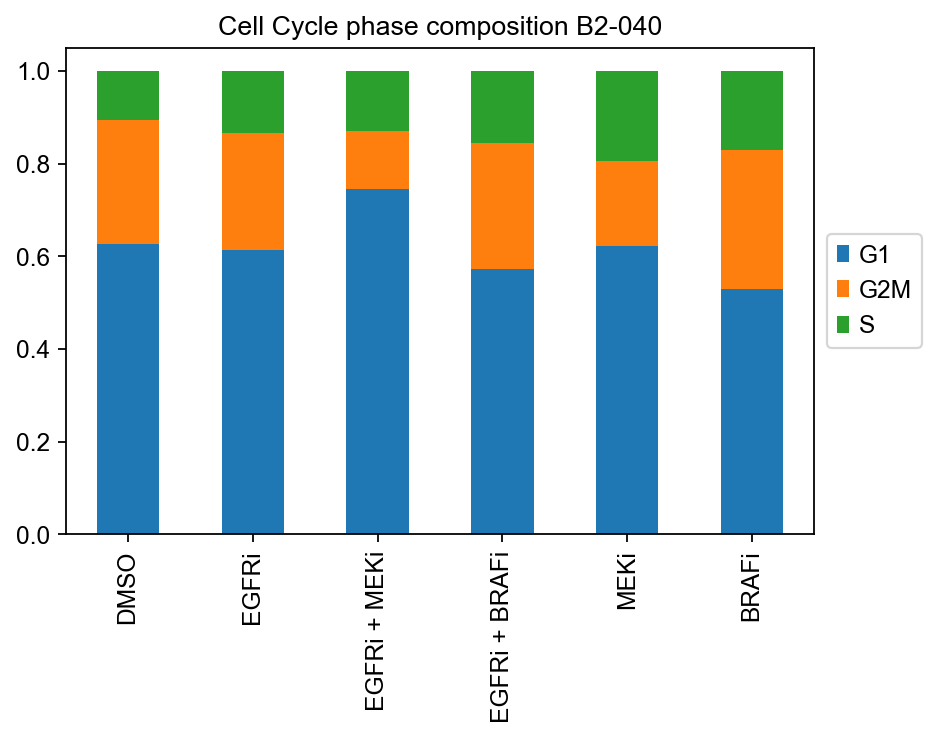

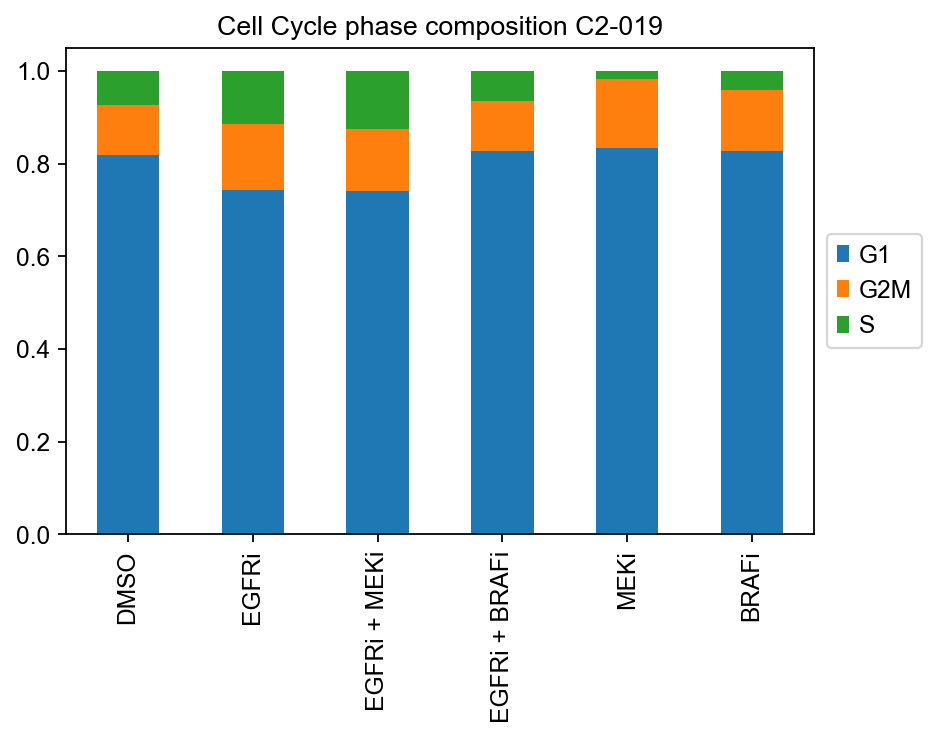

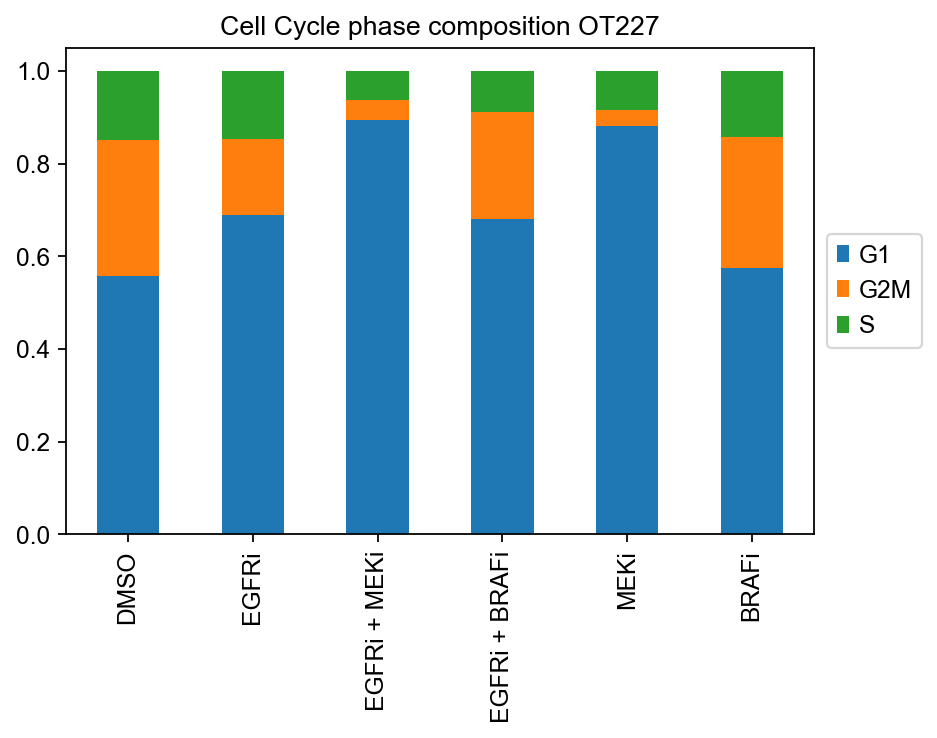

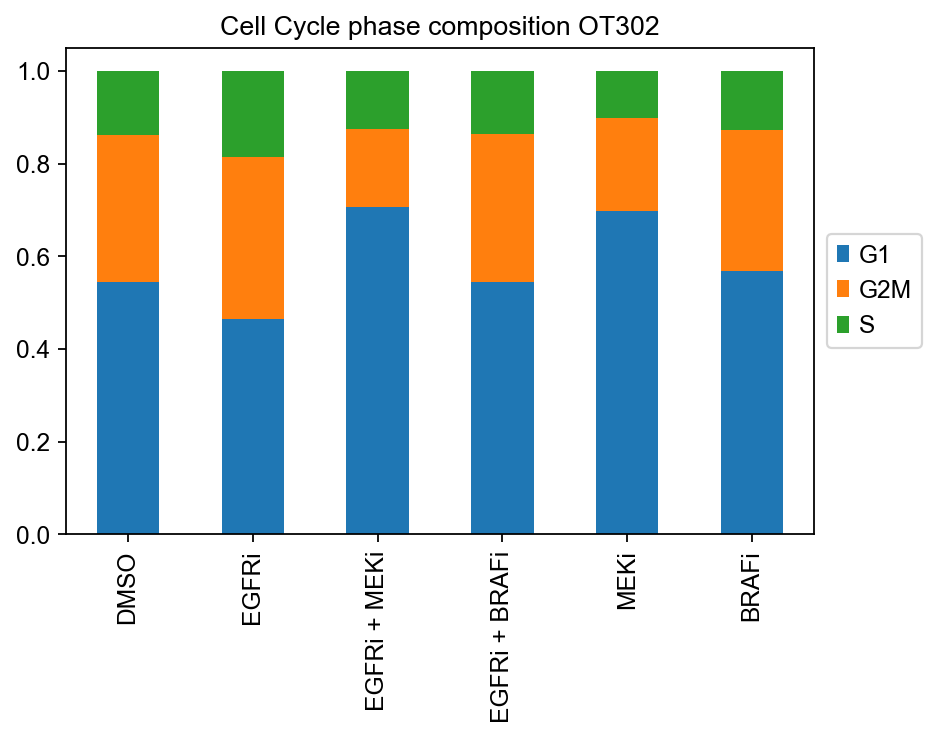

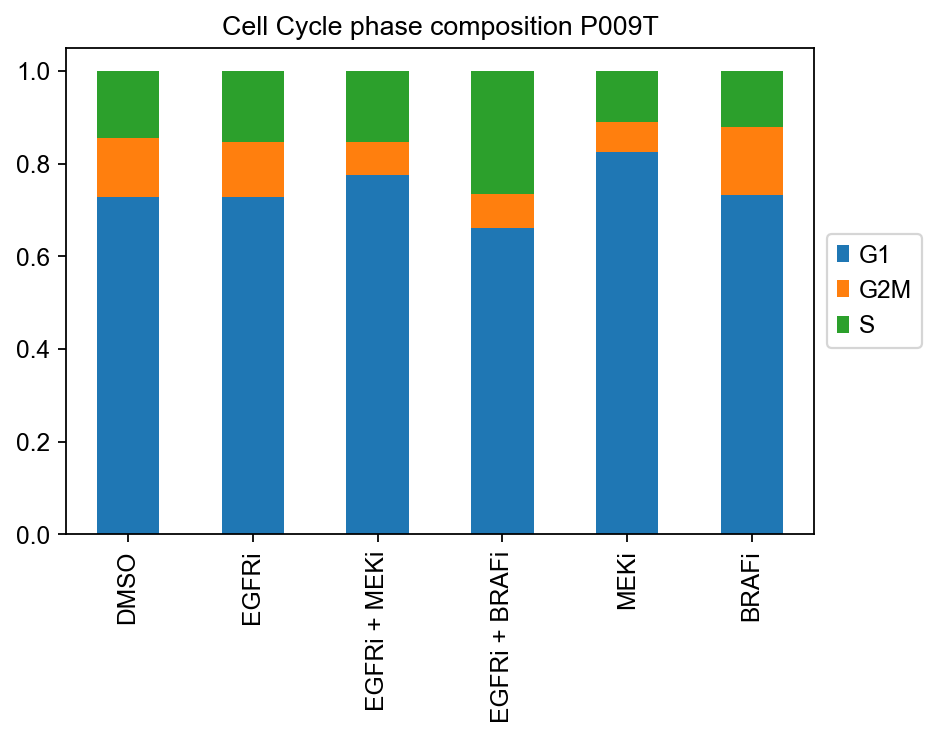

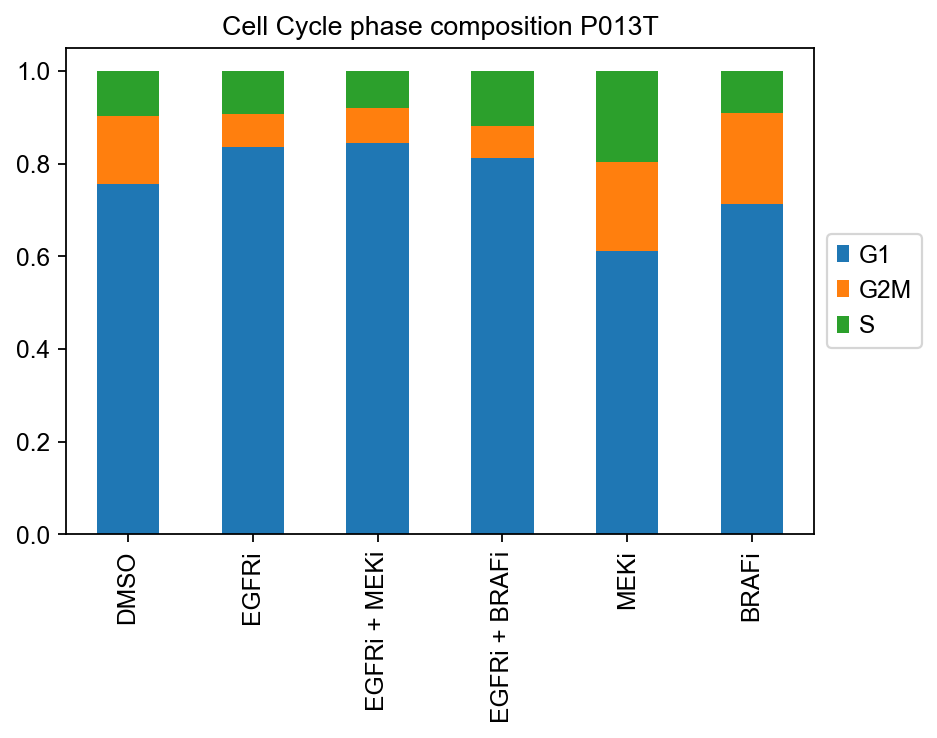

In [3]:
from pathlib import Path
Path(figure_path+'ccphase_barplots/').mkdir(parents=True, exist_ok=True)

writer = pd.ExcelWriter(figure_path+'ccphase_barplots/cellcyclephase_composition_values.xlsx', engine='xlsxwriter')
for donor in tqdm_notebook(donors):
    adata=sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed.h5')
    
    # get data
    d=[]
    for pert in perturbations:
        x=[np.sum(adata.obs.phase[adata.obs.perturbation==pert]==p) for p in adata.obs.phase.cat.categories]
        d.append(x)
    d=np.array(d)
    d=d/np.sum(d,axis=1)[:,np.newaxis]
    df=pd.DataFrame(d, index=perturbations_, columns=adata.obs.phase.cat.categories)
    
    # plot
    ax = df.plot.bar(stacked=True, title='Cell Cycle phase composition '+donor)
    pl.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    pl.savefig(figure_path +'ccphase_barplots/'+ donor+'_ccphase_barplot.pdf')
    pl.show()
    del adata
    df.to_excel(writer, sheet_name=donor)
writer.save()